Original source of dataset: https://www.kaggle.com/competitions/nlp-getting-started/overview

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
import string


### Load the Dataset

In [2]:
dataset = pd.read_csv('./data/train.csv')

### Quick Inspection of Dataset

In [3]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
dataset.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


### Split Dataset

In [50]:
# Split the entire dataset (keeping all columns), then extract y_train and y_val separately
X_train, X_val, y_train, y_val = train_test_split(
    dataset.drop('target', axis=1),  # X: all columns except target
    dataset['target'],  # y: target column
    test_size=0.2, 
    random_state=42, 
    stratify=dataset['target']
)

In [51]:
X_train.head(n=3)

,id,keyword,location,text
6234,8902,snowstorm,"South, USA",Sassy city girl country hunk stranded in Smoky...
326,472,armageddon,Worldwide,God's Kingdom (Heavenly Gov't) will rule over ...
997,1448,body%20bagging,Cloud 9,Mopheme and Bigstar Johnson are a problem in t...


### Drop Unnecessary Columns

In [52]:
# Drop unnecessary columns (id, keyword, location) - keep only 'text' for now
X_train = X_train.drop(columns=['id', 'keyword', 'location'])
X_val = X_val.drop(columns=['id', 'keyword', 'location'])

In [54]:
X_train.head()

# For EDA. We will be dropping the target column after EDA.
X_train['target'] = y_train
X_train.head()

,text,target
6234,Sassy city girl country hunk stranded in Smoky...,1
326,God's Kingdom (Heavenly Gov't) will rule over ...,0
997,Mopheme and Bigstar Johnson are a problem in t...,0
7269,@VixMeldrew sounds like a whirlwind life!,0
2189,Malaysia confirms plane debris washed up on Re...,1


### Exploratory Data Analysis and Feature Engineering

In [56]:
## Checking for missing values
X_train.isnull().sum()

text      0
target    0
dtype: int64

In [57]:
## Checking for duplicates
X_train['text'].duplicated().sum()

np.int64(72)

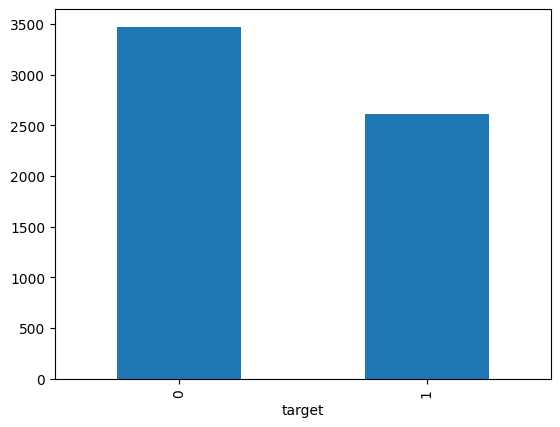

In [58]:
## Checking for class imbalance
y_train.value_counts().plot(kind='bar')
plt.show()

#### Add useful features


In [59]:
X_train

,text,target
6234,Sassy city girl country hunk stranded in Smoky...,1
326,God's Kingdom (Heavenly Gov't) will rule over ...,0
997,Mopheme and Bigstar Johnson are a problem in t...,0
7269,@VixMeldrew sounds like a whirlwind life!,0
2189,Malaysia confirms plane debris washed up on Re...,1
...,...,...
3386,ÛÏA voluntary evacuation is being recommended...,1
3280,RT @calestous: Tanzania elephant population de...,1
305,#PBBan (Temporary:300) Russaky89 @'aRmageddon ...,0
1648,Petition | Heartless owner that whipped horse ...,0


In [60]:
## Length of the tweet
X_train['length'] = X_train['text'].apply(len)
X_train.head()

,text,target,length
6234,Sassy city girl country hunk stranded in Smoky...,1,116
326,God's Kingdom (Heavenly Gov't) will rule over ...,0,135
997,Mopheme and Bigstar Johnson are a problem in t...,0,86
7269,@VixMeldrew sounds like a whirlwind life!,0,41
2189,Malaysia confirms plane debris washed up on Re...,1,102


In [61]:
## Word count
X_train['word_count'] = X_train['text'].apply(lambda x: len(str(x).split()))
X_train.head()


,text,target,length,word_count
6234,Sassy city girl country hunk stranded in Smoky...,1,116,14
326,God's Kingdom (Heavenly Gov't) will rule over ...,0,135,16
997,Mopheme and Bigstar Johnson are a problem in t...,0,86,14
7269,@VixMeldrew sounds like a whirlwind life!,0,41,6
2189,Malaysia confirms plane debris washed up on Re...,1,102,14


In [62]:
# Download required NLTK data (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishamrashik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishamrashik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ishamrashik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [63]:
X_train

,text,target,length,word_count
6234,Sassy city girl country hunk stranded in Smoky...,1,116,14
326,God's Kingdom (Heavenly Gov't) will rule over ...,0,135,16
997,Mopheme and Bigstar Johnson are a problem in t...,0,86,14
7269,@VixMeldrew sounds like a whirlwind life!,0,41,6
2189,Malaysia confirms plane debris washed up on Re...,1,102,14
...,...,...,...,...
3386,ÛÏA voluntary evacuation is being recommended...,1,142,22
3280,RT @calestous: Tanzania elephant population de...,1,134,15
305,#PBBan (Temporary:300) Russaky89 @'aRmageddon ...,0,94,16
1648,Petition | Heartless owner that whipped horse ...,0,128,20


In [64]:
# Define the list of English stopwords
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
X_train['num_stop_words'] = X_train['text'].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))

In [65]:
# Number of punctuation characters
X_train['num_punctuation'] = X_train['text'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
X_train.head()

,text,target,length,word_count,num_stop_words,num_punctuation
6234,Sassy city girl country hunk stranded in Smoky...,1,116,14,1,8
326,God's Kingdom (Heavenly Gov't) will rule over ...,0,135,16,6,15
997,Mopheme and Bigstar Johnson are a problem in t...,0,86,14,5,1
7269,@VixMeldrew sounds like a whirlwind life!,0,41,6,1,2
2189,Malaysia confirms plane debris washed up on Re...,1,102,14,4,5


In [66]:
### Now, lets perform text cleaning. We clean the text
from helper import clean_text
# X_train.apply(clean_text)
# Use single brackets to get a Series (not DataFrame), so clean_text receives individual strings
X_train['clean_text'] = X_train['text'].apply(clean_text)


In [67]:
X_train

,text,target,length,word_count,num_stop_words,num_punctuation,clean_text
6234,Sassy city girl country hunk stranded in Smoky...,1,116,14,1,8,sassy city girl country hunk stranded smoky mo...
326,God's Kingdom (Heavenly Gov't) will rule over ...,0,135,16,6,15,god kingdom heavenly govt rule people earth ar...
997,Mopheme and Bigstar Johnson are a problem in t...,0,86,14,5,1,mopheme bigstar johnson problem game body bagg...
7269,@VixMeldrew sounds like a whirlwind life!,0,41,6,1,2,sound like whirlwind life
2189,Malaysia confirms plane debris washed up on Re...,1,102,14,4,5,malaysia confirms plane debris washed reunion ...
...,...,...,...,...,...,...,...
3386,ÛÏA voluntary evacuation is being recommended...,1,142,22,6,3,voluntary evacuation recommended time pickerel...
3280,RT @calestous: Tanzania elephant population de...,1,134,15,2,13,rt tanzania elephant population declined five ...
305,#PBBan (Temporary:300) Russaky89 @'aRmageddon ...,0,94,16,1,10,pbban temporary russaky armageddon not kill fl...
1648,Petition | Heartless owner that whipped horse ...,0,128,20,7,8,petition heartless owner whipped horse collaps...


In [68]:
# Text column is no more required
X_train = X_train.drop(columns=['text'])
X_train.head()


,target,length,word_count,num_stop_words,num_punctuation,clean_text
6234,1,116,14,1,8,sassy city girl country hunk stranded smoky mo...
326,0,135,16,6,15,god kingdom heavenly govt rule people earth ar...
997,0,86,14,5,1,mopheme bigstar johnson problem game body bagg...
7269,0,41,6,1,2,sound like whirlwind life
2189,1,102,14,4,5,malaysia confirms plane debris washed reunion ...


In [69]:
# We will again encode back to numbers for the target column
X_train['target'] = X_train['target'].map({0: 'not_disaster', 1: 'disaster'})
X_train.head()

,target,length,word_count,num_stop_words,num_punctuation,clean_text
6234,disaster,116,14,1,8,sassy city girl country hunk stranded smoky mo...
326,not_disaster,135,16,6,15,god kingdom heavenly govt rule people earth ar...
997,not_disaster,86,14,5,1,mopheme bigstar johnson problem game body bagg...
7269,not_disaster,41,6,1,2,sound like whirlwind life
2189,disaster,102,14,4,5,malaysia confirms plane debris washed reunion ...


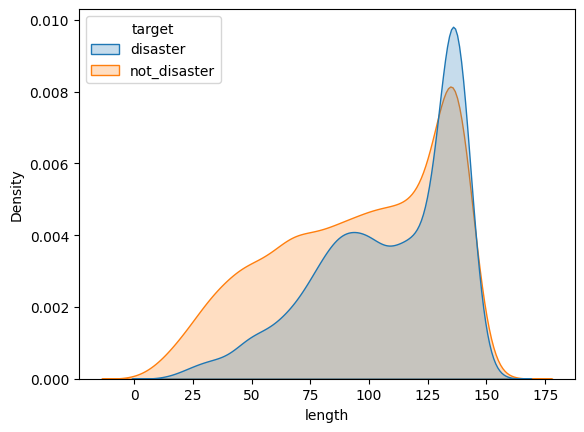

In [20]:
# Distribution of length
sns.kdeplot(X_train, x='length', hue='target', fill=True)
plt.show()

This is a kernel density plot (KDE) showing the distribution of a "length" feature for two classes in your dataset: "disaster" and "not_disaster".

What it shows:
The distributions are very similar but slightly different:

- Blue (disaster): Peaks sharply around length ~140, with most values concentrated between 100-150
- Orange (not_disaster): Also peaks around 125-140, but has more spread across the range, with a notable presence of shorter lengths (25-100)

Key observations:

Heavy overlap: The two classes have very similar length distributions, especially in the 100-150 range. This suggests that "length" alone won't be a strong discriminator between disaster and non-disaster samples.

Both are right-skewed: Most values cluster toward the higher end of the length range

What this means for modeling:
Since the distributions overlap so much, your model will likely need other features beyond just "length" to effectively distinguish between disaster and non-disaster samples. Length provides some signal, but it's not enough on its own.

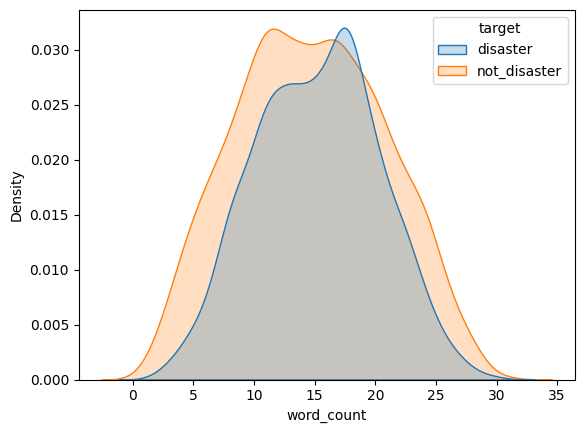

In [21]:
# Distribution of word count
sns.kdeplot(X_train, x='word_count', hue='target', fill=True)
plt.show()


This KDE plot shows the distribution of word count for disaster vs non-disaster tweets. Here's what's happening:

Key Observations:
Distribution patterns:
- Orange (not_disaster): Peaks earlier around 12-13 words, more concentrated on the left
- Blue (disaster): Peaks slightly later around 15-16 words, extends more to the right

What this tells us:
- Disaster tweets tend to be slightly longer: The blue distribution is shifted slightly to the right, suggesting disaster-related tweets use a few more words on average.
- Still substantial overlap: Like the length plot, there's heavy overlap between the two classes in the 10-20 word range, meaning word count alone won't perfectly separate them.
- Both are roughly normally distributed: Unlike the length plot which was skewed, word counts follow a more symmetric bell-curve shape centered around 12-18 words.

Why might disaster tweets be longer?
Disaster tweets might contain more details like:

- Location information ("in downtown", "near the bridge")
- Urgency indicators ("breaking", "right now", "please help")
- Specific details about the event ("fire", "flood", "collapsed")

Whereas non-disaster tweets using disaster-related words might be more casual/metaphorical ("this traffic is a disaster", "totally bombed that test").

For your model:

Word count provides a weak but useful signal - slightly better than character length for distinguishing the classes, but you'll still need the actual content (TF-IDF, embeddings, etc.) to classify effectively.

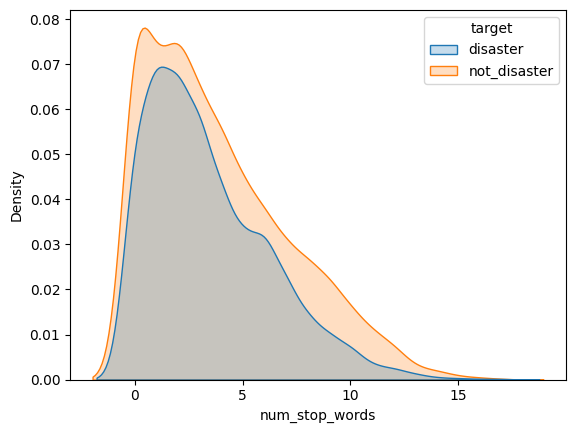

In [70]:
# Distribution of number of stop words
sns.kdeplot(X_train, x='num_stop_words', hue='target', fill=True)
plt.show()


* The KDE plot shows the distribution of the number of stop words for both disaster and non-disaster tweets.
* Most tweets in both categories contain around **2–5 stop words**.
* The **non-disaster tweets** (orange) have a slightly higher density at lower stop-word counts.
* The **disaster tweets** (blue) follow a similar pattern but with slightly more variation.
* The heavy overlap between the two curves indicates **low discriminative power** for this feature alone.
* The number of stop words may still offer **minor predictive value** when combined with other features such as tweet length, sentiment, or keyword frequency.
* This feature should be treated as **supportive**, not a primary signal, in the classification model.


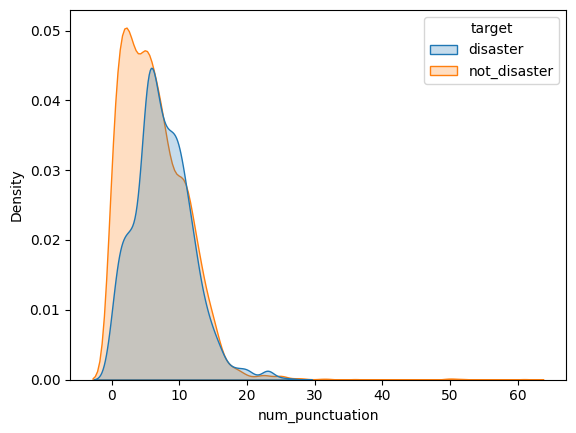

In [72]:
# Distribution of number of punctuation characters
sns.kdeplot(X_train, x='num_punctuation', hue='target', fill=True)
plt.show()

* The KDE plot shows the distribution of the **number of punctuation characters** in disaster and non-disaster tweets.
* Both classes peak between **2–8 punctuation marks**, indicating most tweets contain a small amount of punctuation.
* The **non-disaster tweets** (orange) show a slightly higher density near zero punctuation, suggesting they tend to be simpler or more neutral in tone.
* The **disaster tweets** (blue) exhibit a slightly broader spread, possibly reflecting more expressive or urgent language (e.g., “!!!”, “??”, “...”).
* Despite this minor variation, the two curves **overlap heavily**, implying this feature alone has **limited discriminative power**.
* The feature might still provide **supporting value** when used with other linguistic or emotional indicators (like sentiment intensity or word count).
* Overall, the **number of punctuation characters** can complement other textual features but is **not sufficient** for reliable classification on its own.

In [73]:
from helper import plot_top_words, plot_word_cloud

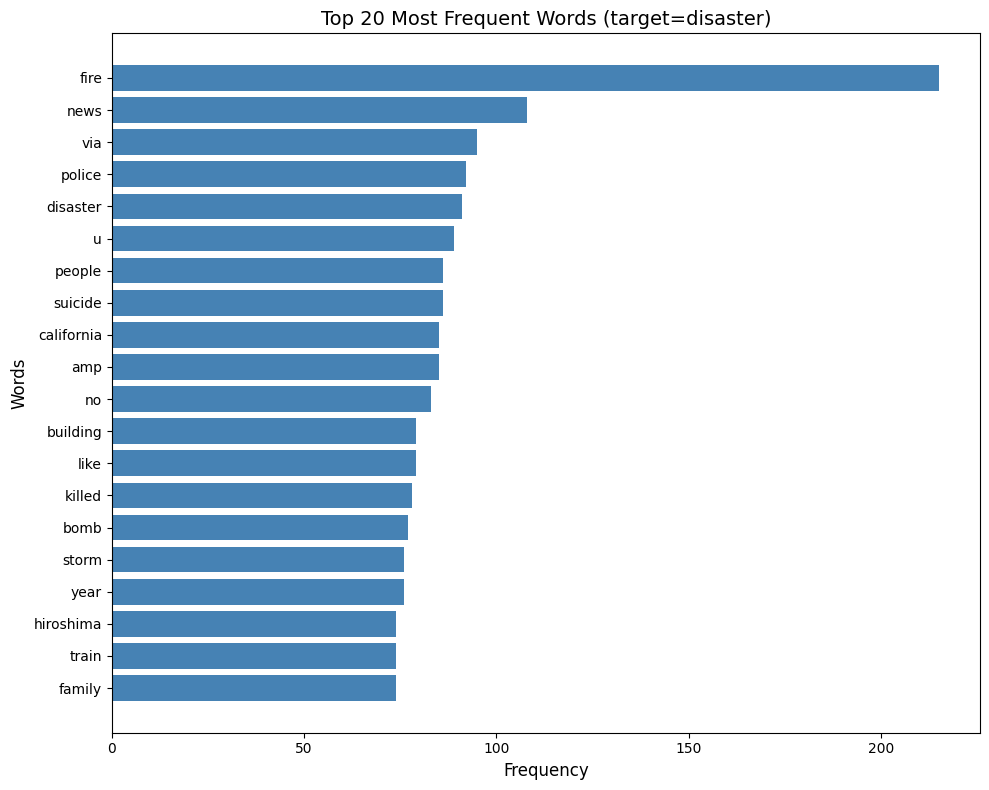

In [74]:
# Example: Plot top 25 words from cleaned text
plot_top_words(dataframe=X_train, text_column='clean_text', target_column='target', target_value='disaster', n=20)

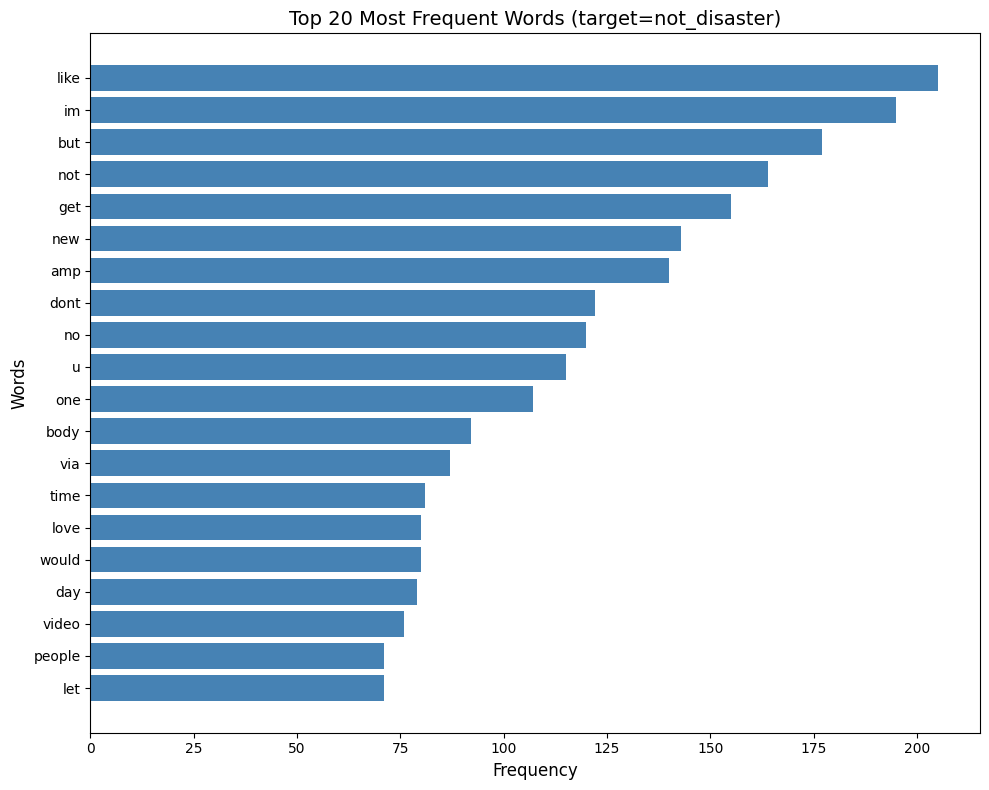

In [75]:
# Example: Plot top 25 words from cleaned text
plot_top_words(dataframe=X_train, text_column='clean_text', target_column='target', target_value='not_disaster', n=20)

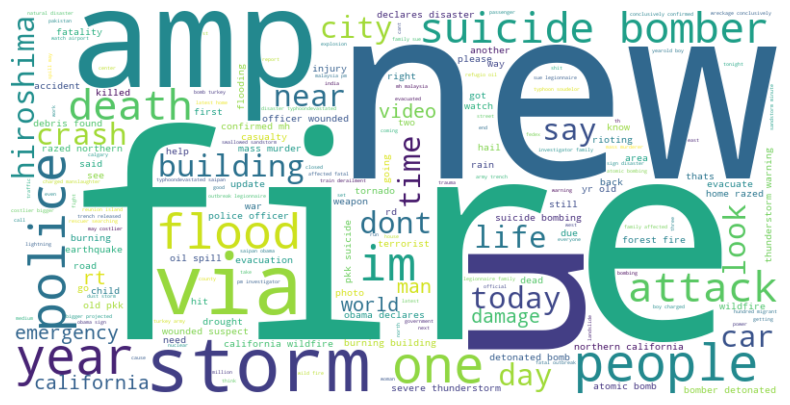

In [76]:
plot_word_cloud(X_train[X_train['target'] == 'disaster']['clean_text'])

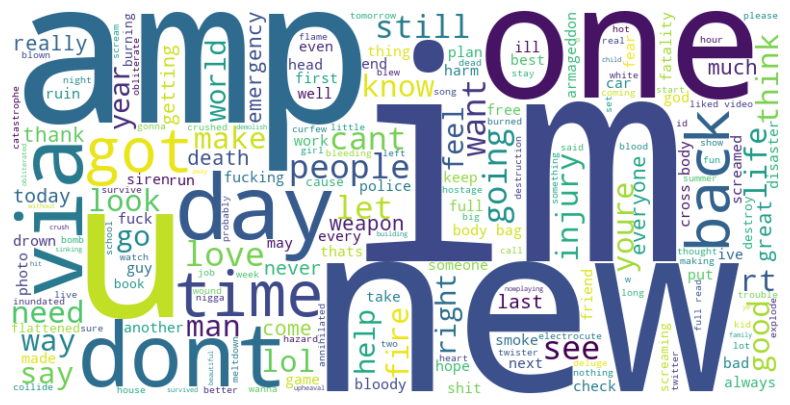

In [77]:
plot_word_cloud(X_train[X_train['target'] == 'not_disaster']['clean_text'])

Now, that EDA is done, we will be performing final step of Feature Engineering. As our models understand numbers well, we will convert clean_text to numbers. We will be using TF-IDF mention instead of Bag-of-Words.

In [78]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

In [79]:
# Step 1: Vectorize the text comments (Bag of Words)
X_train_text = vectorizer.fit_transform(X_train['clean_text']).toarray()

In [83]:
X_train_text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6090, 10000))

In [81]:
# Step 2: Extract numerical features

# Define the numerical feature columns to include
numerical_features = ['length', 'word_count', 'num_stop_words', 'num_punctuation']

X_train_numerical = X_train[numerical_features].values



In [82]:
X_train_numerical

array([[116,  14,   1,   8],
       [135,  16,   6,  15],
       [ 86,  14,   5,   1],
       ...,
       [ 94,  16,   1,  10],
       [128,  20,   7,   8],
       [ 91,  16,   7,   8]], shape=(6090, 4))

In [84]:
# Step 3: Combine text features with numerical features
import numpy as np

X_train_transformed = np.hstack([X_train_text, X_train_numerical])

In [85]:
# We will apply the same feature engineering steps on the validation set
from helper import include_numerical_features_and_clean_text, vectorize_text
X_val = include_numerical_features_and_clean_text(X_val)
X_val_transformed = vectorize_text(X_val, vectorizer)

In [86]:
X_val_transformed

array([[ 0.,  0.,  0., ..., 11.,  3.,  4.],
       [ 0.,  0.,  0., ..., 20.,  3., 14.],
       [ 0.,  0.,  0., ..., 12.,  1.,  5.],
       ...,
       [ 0.,  0.,  0., ..., 12.,  3., 14.],
       [ 0.,  0.,  0., ..., 11.,  6.,  7.],
       [ 0.,  0.,  0., ...,  5.,  0.,  7.]], shape=(1523, 10004))

In [87]:
X_train_transformed

array([[ 0.,  0.,  0., ..., 14.,  1.,  8.],
       [ 0.,  0.,  0., ..., 16.,  6., 15.],
       [ 0.,  0.,  0., ..., 14.,  5.,  1.],
       ...,
       [ 0.,  0.,  0., ..., 16.,  1., 10.],
       [ 0.,  0.,  0., ..., 20.,  7.,  8.],
       [ 0.,  0.,  0., ..., 16.,  7.,  8.]], shape=(6090, 10004))

### Train the Model

In [88]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 40, 40, 40), activation='relu', solver='adam', max_iter=400, random_state=42)
mlp.fit(X_train_transformed, y_train)

,hidden_layer_sizes,"(40, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,400
,shuffle,True
,random_state,42


### Model Evaluation

In [89]:
# Predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = mlp.predict(X_val_transformed)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))

Accuracy: 0.7609980302035456
Precision: 0.7251552795031055
Recall: 0.7140672782874617
F1-Score: 0.7195685670261941


### Save the Vectorizer and the Model

In [90]:
import joblib
joblib.dump(vectorizer, 'vectorizer.joblib')
joblib.dump(mlp, 'mlp.joblib')

['mlp.joblib']

### Load and Run the Model

In [91]:
loaded_vectorizer = joblib.load('vectorizer.joblib')
loaded_mlp = joblib.load('mlp.joblib')



In [92]:
y_pred = loaded_mlp.predict(X_val_transformed)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))

Accuracy: 0.7609980302035456
Precision: 0.7251552795031055
Recall: 0.7140672782874617
F1-Score: 0.7195685670261941


In [93]:
from helper import prepare_single_sentence

In [94]:
def predict_single_sentence(sentence, vectorizer):
    loaded_vectorizer = joblib.load('vectorizer.joblib')
    loaded_mlp = joblib.load('mlp.joblib')
    
    y_pred = loaded_mlp.predict(prepare_single_sentence(sentence, loaded_vectorizer))
    
    if y_pred[0] == 1:
        return "Disaster"
    else:
        return "Not Disaster"
    

predict_single_sentence("There is a huge fire in the building!", loaded_vectorizer)


'Disaster'

In [95]:
predict_single_sentence("I love staying at my home", loaded_vectorizer)

'Not Disaster'

In [99]:
predict_single_sentence("Workshop was lit!!!", loaded_vectorizer)

'Not Disaster'